<a href="https://colab.research.google.com/github/Phuc0417/AI_2023/blob/main/AI_w6(fuzzylogic_DCmotor)_10_03_23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 17.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=56d787742fdda7d9ffe70e91d0c094191ea0981c9deda85cba27bcd92b8aafc3
  Stored in directory: /root/.cache/pip/wheels/32/2c/a1/a90a7d7dd8448ec029f298a61f3490275e99b17aa348be675c
Successfully built scikit-fuzzy


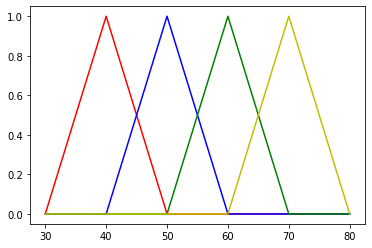

In [ ]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

x = np.arange(30,81,1)

slow = fuzz.trimf(x,[30,40,50])
medium = fuzz.trimf(x,[40,50,60])
medium_fast = fuzz.trimf(x,[50,60,70])
full_fast = fuzz.trimf(x,[60,70,80])

plt.figure()
plt.plot(x,slow,'r',linewidth=1.5,label='slow')
plt.plot(x,medium,'b',linewidth=1.5,label='medium')
plt.plot(x,medium_fast,'g',linewidth=1.5,label='medium_fast')
plt.plot(x,full_fast,'y',linewidth=1.5,label='full_fast')




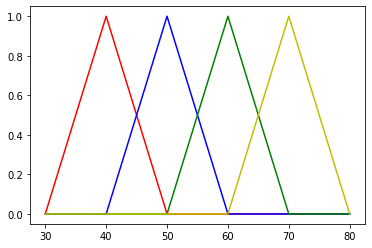

In [ ]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

x = np.arange(30,81,1)

slow = fuzz.trapmf(x,[30,40,40,50])
medium = fuzz.trapmf(x,[40,50,50,60])
medium_fast = fuzz.trapmf(x,[50,60,60,70])
full_fast = fuzz.trapmf(x,[60,70,70,80])

plt.figure()
plt.plot(x,slow,'r',linewidth=1.5,label='slow')
plt.plot(x,medium,'b',linewidth=1.5,label='medium')
plt.plot(x,medium_fast,'g',linewidth=1.5,label='medium_fast')
plt.plot(x,full_fast,'y',linewidth=1.5,label='full_fast')


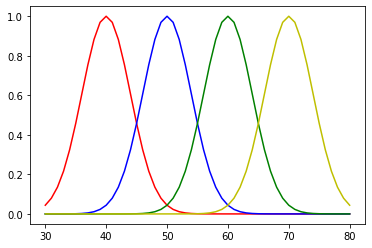

In [ ]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

x = np.arange(30,81,1)

slow = fuzz.gaussmf(x,40,4)
medium = fuzz.gaussmf(x,50,4)
medium_fast = fuzz.gaussmf(x,60,4)
full_fast = fuzz.gaussmf(x,70,4)

plt.figure()
plt.plot(x,slow,'r',linewidth=1.5,label='slow')
plt.plot(x,medium,'b',linewidth=1.5,label='medium')
plt.plot(x,medium_fast,'g',linewidth=1.5,label='medium_fast')
plt.plot(x,full_fast,'y',linewidth=1.5,label='full_fast')

20.137850787132102


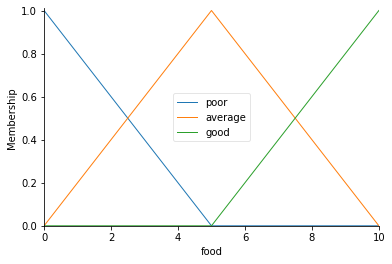

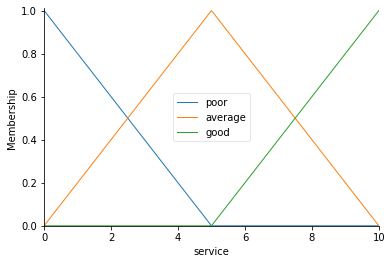

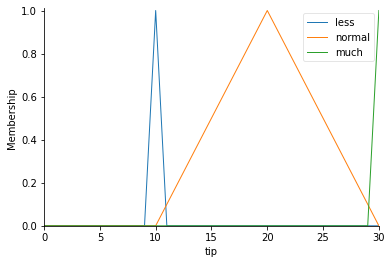

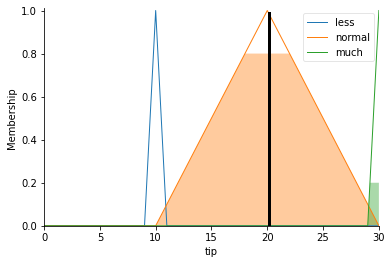

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

food = ctrl.Antecedent(np.arange(0,11,1),'food')
service = ctrl.Antecedent(np.arange(0,11,1),'service')
tip = ctrl.Consequent(np.arange(0,31,1),'tip')

food['poor']=fuzz.trimf(food.universe,[0,0,5])
food['average']=fuzz.trimf(food.universe,[0,5,10])
food['good']=fuzz.trimf(food.universe,[5,10,10])

service['poor']=fuzz.trimf(service.universe,[0,0,5])
service['average']=fuzz.trimf(service.universe,[0,5,10])
service['good']=fuzz.trimf(service.universe,[5,10,10])

tip['less']=fuzz.trimf(tip.universe,[10,10,10])
tip['normal']=fuzz.trimf(tip.universe,[10,20,30])
tip['much']=fuzz.trimf(tip.universe,[30,30,30])

food.view()
service.view()
tip.view()

rule1 = ctrl.Rule(food['poor']&service['poor'],tip['less'])
rule2 = ctrl.Rule(food['poor']&service['average'],tip['normal'])
rule3 = ctrl.Rule(food['poor']&service['good'],tip['normal'])
rule4 = ctrl.Rule(food['average']&service['poor'],tip['less'])
rule5 = ctrl.Rule(food['average']&service['average'],tip['normal'])
rule6 = ctrl.Rule(food['average']&service['good'],tip['much'])
rule7 = ctrl.Rule(food['good']&service['poor'],tip['normal'])
rule8 = ctrl.Rule(food['good']&service['average'],tip['normal'])
rule9 = ctrl.Rule(food['good']&service['good'],tip['much'])

tipping_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)
tipping.input['food']= 10
tipping.input['service']= 6
tipping.compute()
print(tipping.output['tip'])
tip.view(sim=tipping)


189.52239448751055


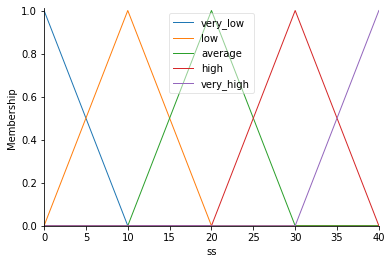

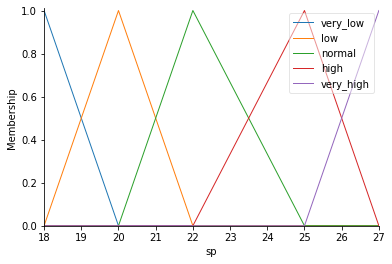

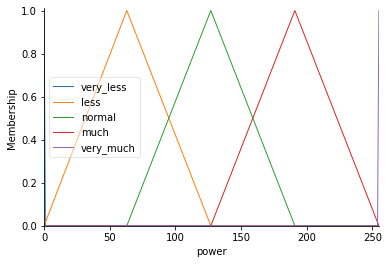

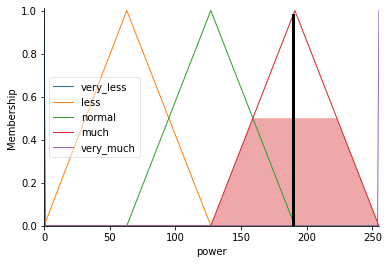

In [ ]:


import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

ss = ctrl.Antecedent(np.arange(0,41,1),'ss')
sp = ctrl.Antecedent(np.arange(18,28,1),'sp')
power = ctrl.Consequent(np.arange(0,256,1),'power')

ss['very_low']=fuzz.trimf(ss.universe,[0,0,10])
ss['low']=fuzz.trimf(ss.universe,[0,10,20])
ss['average']=fuzz.trimf(ss.universe,[10,20,30])
ss['high']=fuzz.trimf(ss.universe,[20,30,40])
ss['very_high']=fuzz.trimf(ss.universe,[30,40,40])

sp['very_low']=fuzz.trimf(sp.universe,[18,18,20])
sp['low']=fuzz.trimf(sp.universe,[18,20,22])
sp['normal']=fuzz.trimf(sp.universe,[20,22,25])
sp['high']=fuzz.trimf(sp.universe,[22,25,27])
sp['very_high']=fuzz.trimf(sp.universe,[25,27,27])

power['very_less']=fuzz.trimf(power.universe,[0,0,0])
power['less']=fuzz.trimf(power.universe,[0,63,127])
power['normal']=fuzz.trimf(power.universe,[63,127,191])
power['much']=fuzz.trimf(power.universe,[127,191,255])
power['very_much']=fuzz.trimf(power.universe,[255,255,255])

ss.view()
sp.view()
power.view()

rule1 = ctrl.Rule(ss['very_low']&sp['very_low'],power['very_much'])
rule2 = ctrl.Rule(ss['very_low']&sp['low'],power['very_much'])
rule3 = ctrl.Rule(ss['very_low']&sp['normal'],power['very_much'])
rule4 = ctrl.Rule(ss['very_low']&sp['high'],power['very_much'])
rule5 = ctrl.Rule(ss['very_low']&sp['very_high'],power['very_much'])

rule6 = ctrl.Rule(ss['low']&sp['very_low'],power['much'])
rule7 = ctrl.Rule(ss['low']&sp['low'],power['very_much'])
rule8 = ctrl.Rule(ss['low']&sp['normal'],power['very_much'])
rule9 = ctrl.Rule(ss['low']&sp['high'],power['very_much'])
rule10 = ctrl.Rule(ss['low']&sp['very_high'],power['very_much'])


rule11 = ctrl.Rule(ss['average']&sp['very_low'],power['very_less'])
rule12 = ctrl.Rule(ss['average']&sp['low'],power['less'])
rule13 = ctrl.Rule(ss['average']&sp['normal'],power['normal'])
rule14 = ctrl.Rule(ss['average']&sp['high'],power['much'])
rule15 = ctrl.Rule(ss['average']&sp['very_high'],power['much'])

rule16 = ctrl.Rule(ss['high']&sp['very_low'],power['very_less'])
rule17 = ctrl.Rule(ss['high']&sp['low'],power['very_less'])
rule18 = ctrl.Rule(ss['high']&sp['normal'],power['very_less'])
rule19 = ctrl.Rule(ss['high']&sp['high'],power['very_less'])
rule20 = ctrl.Rule(ss['high']&sp['very_high'],power['very_less'])

rule21 = ctrl.Rule(ss['very_high']&sp['very_low'],power['very_less'])
rule22 = ctrl.Rule(ss['very_high']&sp['low'],power['very_less'])
rule23 = ctrl.Rule(ss['very_high']&sp['normal'],power['very_less'])
rule24 = ctrl.Rule(ss['very_high']&sp['high'],power['very_less'])
rule25 = ctrl.Rule(ss['very_high']&sp['very_high'],power['very_less'])

powering_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18,rule19,rule20,rule21,rule22,rule23,rule24,rule25])
powering = ctrl.ControlSystemSimulation(powering_ctrl)
powering.input['ss']= 25
powering.input['sp']= 25
powering.compute()
print(powering.output['power'])
power.view(sim=powering)





